# Baseline Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import Ridge

np.random.seed(42)


## Load in Clean Training Data

This data set includes all rows with null values changed to "None" and empty rows filled with 0s.

In [2]:
df = pd.read_csv('../datasets/aimes_clean_data', index_col='Id')

In [3]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,<function <lambda> at 0x1c1b72ac80>,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,None,None,None,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,None,None,None,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,3,2010,WD,138500


## Features

In this model and I am incorporating all features with the exception of object variables.

In [4]:
df = df.select_dtypes(exclude='object')

In [5]:
df.shape

(2051, 33)

## Train Test Split

In [6]:
X = df.drop('sale_price',1)
y = df['sale_price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Naive Model

In [8]:
np.mean(y_train)

181061.9934980494

This our baseline model (what we need to beat). This value is just the mean of the target for our training data.

## Scale Data

In [9]:
ss = StandardScaler()
ss.fit(X_train)  #always ONLY fit to just the training data. transform to all!
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lr.score(X_train_sc, y_train)

0.8250743176589841

In [12]:
lr.score(X_test_sc, y_test)

0.8608709629268055

## Interpretation

The test score is higher on X_test which could mean that this is due to random chance. Therefore I cannot conclude that my model is a good one. I can also reference the Beta Coefficients. See below.

In [13]:
lr.intercept_

181061.06958995757

The y-intercept or Beta_Naughtfor this model is $181,063. We cannot assume that if any of our features are 0 that the price of our home is the value of our intercept. 

In [14]:
lr.coef_

array([-5.94414603e+03,  4.21114944e+03,  2.59508264e+04,  2.80718669e+03,
        9.32420480e+03,  6.52238936e+03,  6.58737484e+03, -3.08184610e+15,
       -1.11668829e+15, -2.91411288e+15,  2.99118201e+15, -2.84694188e+16,
       -2.99811397e+16, -3.71940221e+15,  3.57237090e+16,  1.72897942e+03,
       -8.66904749e+02, -5.59062051e+03, -2.01907411e+03,  9.05985821e+03,
        2.59818394e+03,  3.86786546e+03,  2.50836646e+03,  3.24118073e+03,
        5.56171332e+02,  1.36081782e+03,  7.19250359e+02,  5.64399376e+03,
       -5.52848337e+03, -8.50886741e+03,  6.37642406e+02, -5.45267251e+02])

## Lasso

Instantiate our Model

In [15]:
lasso = LassoCV(n_alphas=100)

Fit Our Model

In [16]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

#### Lasso Train Score

In [17]:
lasso.score(X_train_sc, y_train)

0.8092574811049292

#### Lasso Test Score

In [18]:
lasso.score(X_test_sc,y_test)

0.8559738302713368

Our Lasso Test Score is also higher than our Lasso Train Score which could be do to random chance. Therefore, I cannot use 
this model. We can also note that our alpha is high (100). The higher the alpha, the more features are reduced to 0. 

In [19]:
lasso_betas = pd.DataFrame(data=lasso.coef_,index=X.columns,columns=['weights'])

In [20]:
lasso_betas['abs_w'] = lasso_betas.weights.abs()

In [21]:
lasso_betas.sort_values('abs_w', ascending=False, inplace=True)

Text(0.5, 1.0, 'Lasso Beta Weights\ny_intercept: 181061.99')

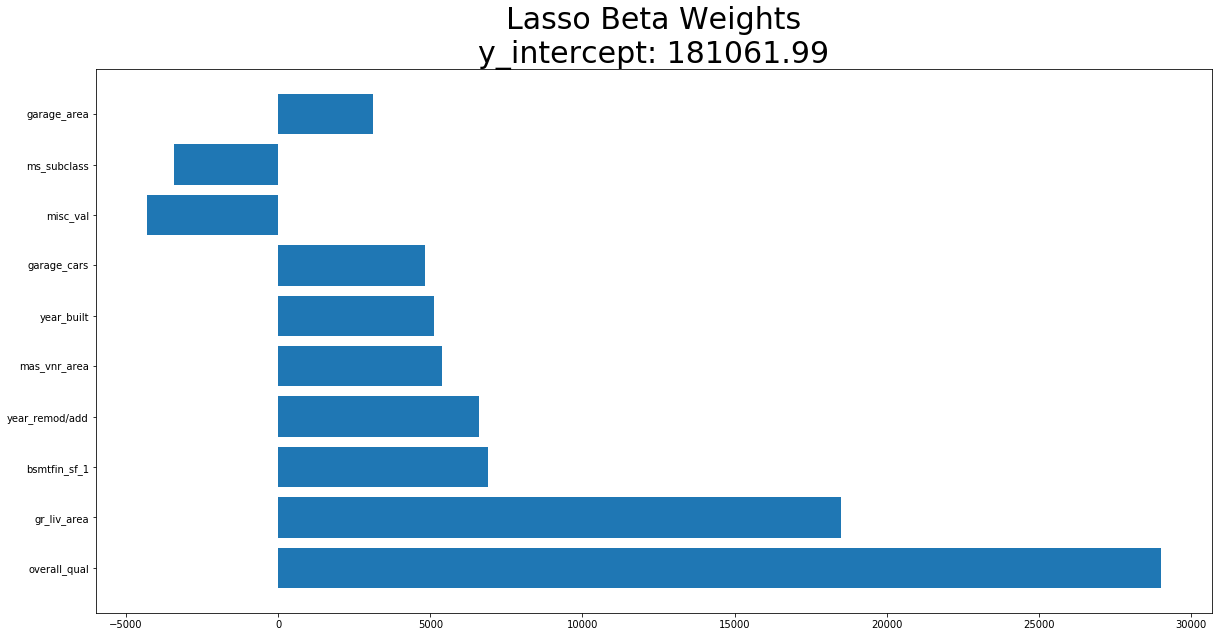

In [22]:
plt.figure(figsize= (20,10))
plt.barh(lasso_betas.head(10).index, lasso_betas['weights'].head(10))
plt.title(f'Lasso Beta Weights\ny_intercept: {lasso.intercept_:.2f}', size=30)

Lasso Beta Weights are quite large. Increasing the Overall Quality of the Home by one step (ex. Good to Very Good) will result in an increase in home value of almost 29,000 dollars. Increasing the Above Ground Living Area (gr_liv_area) by one square foot will add 18,000 dollars to the home price. That said, these coefficients are quite large and I will want to evaluate another model. 

## Ridge

#### Instantiate Our Model

In [23]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

#### Fit Our Model

In [24]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

#### Ridge Train Score

In [25]:
ridge.score(X_train_sc, y_train)

0.8250639456129601

#### Ridge Test Score

In [26]:
ridge.score(X_test_sc, y_test)

0.8609589589272558

Our Ridge Test Score is higher than our Ridge Train Score which could be do to chance. I would not want to use this model to explain the variance in my response data.

In [27]:
ridge_betas = pd.DataFrame(data=ridge.coef_,index=X.columns,columns=['weights'])

In [28]:
ridge_betas['abs_w'] = ridge_betas.weights.abs()

In [29]:
ridge_betas.sort_values('abs_w', ascending=False, inplace=True)

Text(0.5, 1.0, 'Ridge Beta Weights\ny_intercept: 181061.99')

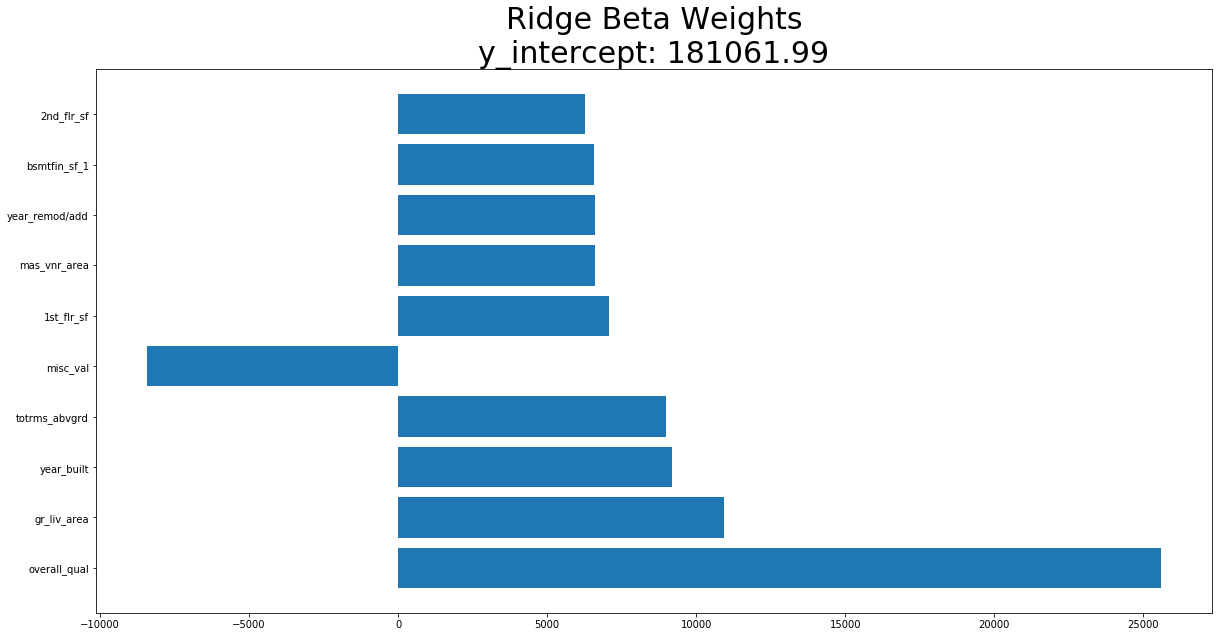

In [30]:
plt.figure(figsize= (20,10))
plt.barh(ridge_betas.head(10).index, ridge_betas['weights'].head(10))
plt.title(f'Ridge Beta Weights\ny_intercept: {ridge.intercept_:.2f}', size=30)

My Ridge Coefficients and their weights differ from the Lasso Method.  and theIncreasing the Overall Quality of the Home by one step (ex. Good to Very Good) will result in an increase in home value of almost 25,000 dollars. Increasing the Above Ground Living Area (gr_liv_area) by one square foot will add 12,500 dollars to the home price. This model is  more conservative and I would consider using it with more more robust feature selection.

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
y_hat  = ridge.predict(X_test_sc)

In [33]:
mean_squared_error(y_test, y_hat)

853715430.7148263

In [34]:
mse  = np.mean(mean_squared_error(y_test, y_hat))

In [35]:
rmse = np.sqrt(mse)
rmse

29218.409106500414

Text(0.5, 1.0, 'RMSE')

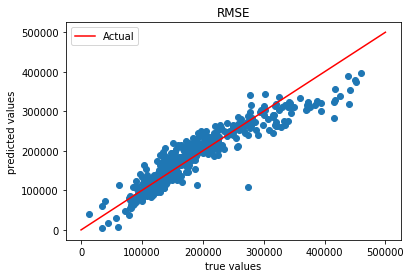

In [36]:
plt.scatter(y_test,ridge.predict(X_test_sc))
plt.ylabel('predicted values')
plt.xlabel('true values')
plt.plot([0, 500000], [0, 500000], color='r')
plt.legend(['Actual'])
plt.title('RMSE')

My model has an RMSE of 29,218 dollars which means that my predictions have an error + or - that value. My model predicts well for home values between the range of 100,000 and 250,000 dollars and then predicts worse as the true values get larger. I would not want to use this in production.